# Binarized data

In this notebook, we will load the binarized dataset and take a look into it. This dataset is the result of running the `binarizer.py` script.

In [53]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn

seaborn.set_style('dark')
plt.rcParams['figure.figsize'] = (14,10)

In [2]:
data = pd.read_pickle('../data/binarized_data.pkl')

First, let's check the dimensions and basic stats of the dataset. It should only contain numbers.

In [14]:
data = data.astype(int)

In [13]:
type(data)

pandas.sparse.frame.SparseDataFrame

In [26]:
data.shape

(1128000, 717)

In [15]:
data.head()

23                                          24  \
                other_hashtags other_mentions other_urls tweets hashtag_1:   
user                                                                         
 bdogg                       0              0          0      0          0   
0                            0              0          0      0          0   
00000000                     0              0          0      0          0   
000000000000111              0              0          0      0          0   
000000000101010              0              0          0      0          0   

                                                                       \
                hashtag_Aerotek hashtag_BSB mention_"" other_hashtags   
user                                                                    
 bdogg                        0           0          0              0   
0                             0           0          0              0   
00000000                      0           0          0              0   
000000000000111               0           0          0              0   
000000000101010               0           0          0              0   

                                               ...                  \
                other_mentions                 ...                   
user                                           ...                   
 bdogg                       0                 ...                   
0                            0                 ...                   
00000000                     0                 ...                   
000000000000111              0                 ...                   
000000000101010              0                 ...                   

                          36                                                 \
                hashtag_jobs hashtag_shjobs mention_"" mention_justinbieber   
user                                                                          
 bdogg                     0              0          0                    0   
0                          0              0          0                    0   
00000000                   0              0          0                    0   
000000000000111            0              0          0                    0   
000000000101010            0              0          0                    0   

                                                                 \
                other_hashtags other_mentions other_urls tweets   
user                                                              
 bdogg                       0              0          0      2   
0                            0              0          0      0   
00000000                     0              0          0      1   
000000000000111              0              0          0      0   
000000000101010              0              0          0      0   

                                                                                
                url_http://eepurl.com/dgVR url_http://www.accuweather.com/twtr  
user                                                                            
 bdogg                                   0                                   0  
0                                        0                                   0  
00000000                                 0                                   0  
000000000000111                          0                                   0  
000000000101010                          0                                   0  

[5 rows x 717 columns]

In [16]:
data.info()

<class 'pandas.sparse.frame.SparseDataFrame'>
Index: 1128000 entries,  bdogg to bugottibink
Columns: 717 entries, (23, other_hashtags) to (36, url_http://www.accuweather.com/twtr)
dtypes: int64(717)
memory usage: 523.9+ MB


In [25]:
list(map(lambda c: len(data[[c]].columns.levels[1]), data.columns.levels[0]))

[384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384, 384]

Let's analyze a single week of data.

In [45]:
week = data.loc[:, [28]]
week.columns = week.columns.droplevel(0)

In [46]:
week.head()

,hashtag_1:,hashtag_2central,hashtag_Aerotek,hashtag_LIVESTRONG,hashtag_iranelection,hashtag_jobs,hashtag_unacceptable,"mention_""""",mention_boatsdotcom,mention_yachtchartering,...,url_http://bit.ly/P57Xh,url_http://bit.ly/iUA1X,url_http://bit.ly/qRcMl,url_http://cli.gs/3LsGR,url_http://short.to/ja57,url_http://twcauses.com/ls/,url_http://twitpic.com/9uyz0,url_http://www.accuweather.com/twtr,url_http://www.bebegig.com,url_http://www.kooko.ws
user,,,,,,,,,,,,,,,,,,,,,
bdogg,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00000000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000000000000111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000000000101010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
week.shape

(1128000, 24)

In [48]:
week.describe()

,hashtag_1:,hashtag_2central,hashtag_Aerotek,hashtag_LIVESTRONG,hashtag_iranelection,hashtag_jobs,hashtag_unacceptable,"mention_""""",mention_boatsdotcom,mention_yachtchartering,...,url_http://bit.ly/P57Xh,url_http://bit.ly/iUA1X,url_http://bit.ly/qRcMl,url_http://cli.gs/3LsGR,url_http://short.to/ja57,url_http://twcauses.com/ls/,url_http://twitpic.com/9uyz0,url_http://www.accuweather.com/twtr,url_http://www.bebegig.com,url_http://www.kooko.ws
count,1.128000e+06,1.128000e+06,1.128000e+06,1.128000e+06,1.128000e+06,1.128000e+06,1.128000e+06,1.128000e+06,1.128000e+06,1.128000e+06,...,1.128000e+06,1.128000e+06,1.128000e+06,1.128000e+06,1.128000e+06,1.128000e+06,1.128000e+06,1.128000e+06,1.128000e+06,1.128000e+06
mean,9.751773e-06,1.241135e-05,1.152482e-05,9.751773e-06,1.241135e-05,1.507092e-05,9.751773e-06,1.268617e-03,2.836879e-05,1.773050e-05,...,1.152482e-05,8.865248e-06,9.751773e-06,2.659574e-05,1.063830e-05,9.751773e-06,1.507092e-05,3.723404e-05,1.063830e-05,8.865248e-06
std,3.122769e-03,3.522954e-03,3.394805e-03,3.122769e-03,3.522954e-03,3.882101e-03,3.122769e-03,3.559507e-02,5.326163e-03,4.210724e-03,...,3.394805e-03,2.977445e-03,3.122769e-03,5.157040e-03,3.261624e-03,3.122769e-03,3.882101e-03,6.101859e-03,3.261624e-03,2.977445e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118331f60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11a0e5860>]], dtype=object)

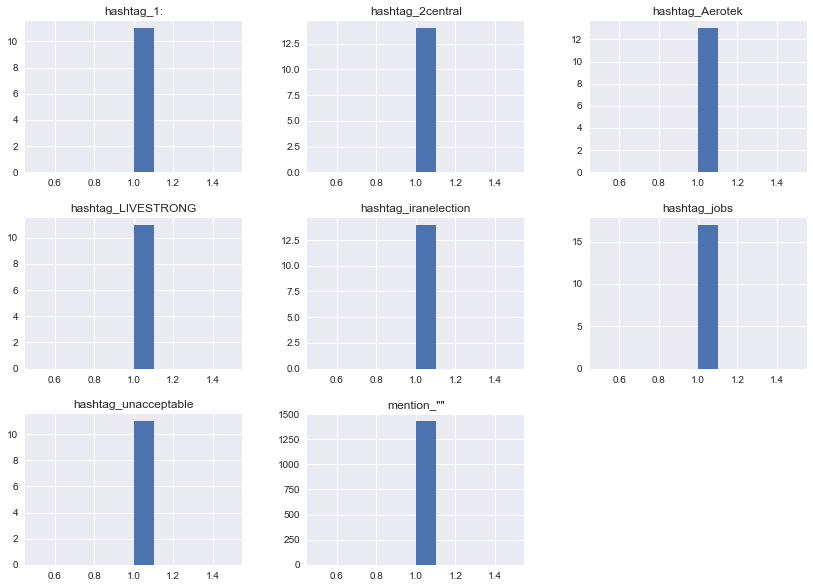

In [54]:
week.iloc[:, 0:8].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118656ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ba42dd8>]], dtype=object)

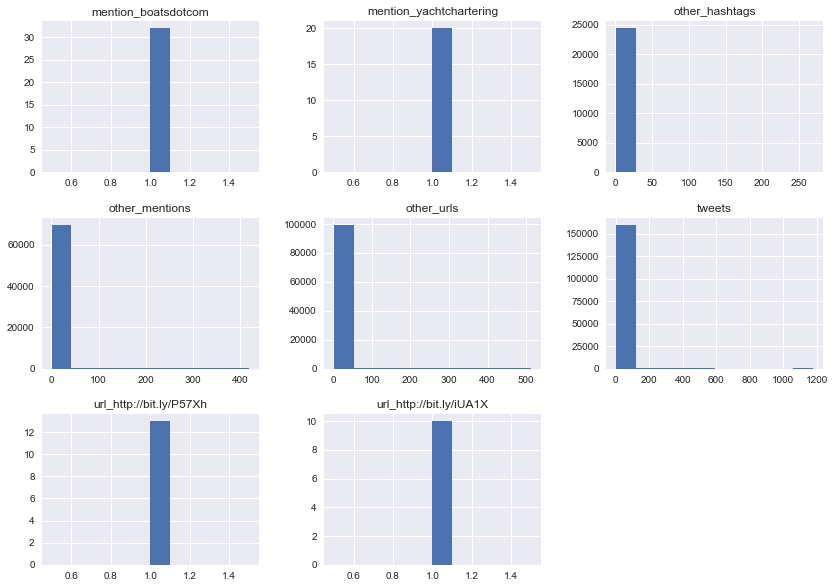

In [55]:
week.iloc[:, 8:16].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11007b550>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11db8ec18>]], dtype=object)

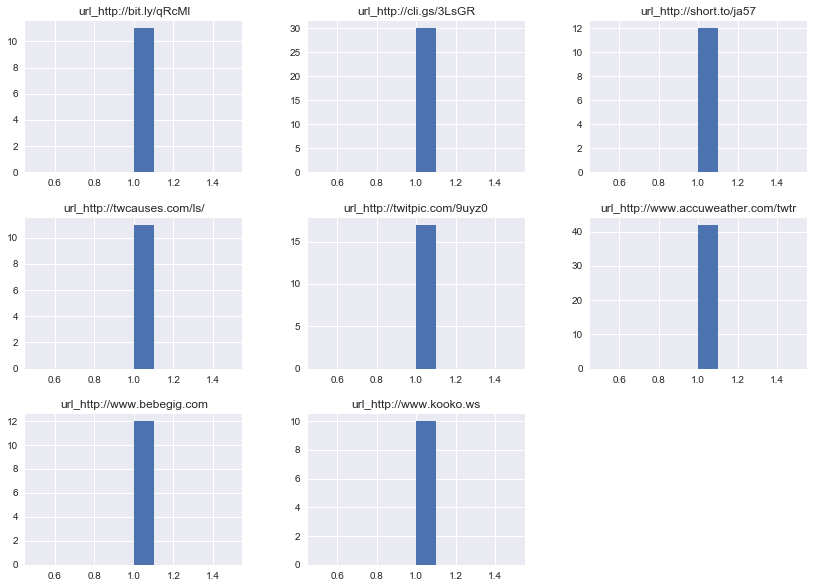

In [56]:
week.iloc[:, 16:24].hist()

All columns have either 0 or 1, except the `other_` columns. We can't normalize the columns because they are just booleans.